IMPORTAR BIBS

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import re
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure
!pip install scipy


%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None

In [3]:


df = pd.read_csv(r"C:\Users\muril\OneDrive\Documentos\MYSQLAlexAnalyst\MoviePython\movies.csv")

df.head()


,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


Procurando Dados Faltantes

In [4]:
for col in df.columns :
   pct_faltante = np.mean(df[col].isnull())
   print('{} - {}%'.format(col, pct_faltante))

name - 0.0%
rating - 0.010041731872717789%
genre - 0.0%
year - 0.0%
released - 0.0002608242044861763%
score - 0.0003912363067292645%
votes - 0.0003912363067292645%
director - 0.0%
writer - 0.0003912363067292645%
star - 0.00013041210224308815%
country - 0.0003912363067292645%
budget - 0.2831246739697444%
gross - 0.02464788732394366%
company - 0.002217005738132499%
runtime - 0.0005216484089723526%


In [7]:
for col in df.columns:
    nulos = df[col].isnull().sum()
    print(f'{col} - {nulos} nulos')


name - 0 nulos
rating - 77 nulos
genre - 0 nulos
year - 0 nulos
released - 2 nulos
score - 3 nulos
votes - 3 nulos
director - 0 nulos
writer - 3 nulos
star - 1 nulos
country - 3 nulos
budget - 2171 nulos
gross - 189 nulos
company - 17 nulos
runtime - 4 nulos


In [8]:
df.info

<bound method DataFrame.info of                                                 name rating      genre  year  \
0                                        The Shining      R      Drama  1980   
1                                    The Blue Lagoon      R  Adventure  1980   
2     Star Wars: Episode V - The Empire Strikes Back     PG     Action  1980   
3                                          Airplane!     PG     Comedy  1980   
4                                         Caddyshack      R     Comedy  1980   
...                                              ...    ...        ...   ...   
7663                                    More to Life    NaN      Drama  2020   
7664                                     Dream Round    NaN     Comedy  2020   
7665                                   Saving Mbango    NaN      Drama  2020   
7666                                    It's Just Us    NaN      Drama  2020   
7667                                       Tee em el    NaN     Horror  2020   

       

In [9]:
df = df.dropna()
df.info

<bound method DataFrame.info of                                                 name     rating      genre  \
0                                        The Shining          R      Drama   
1                                    The Blue Lagoon          R  Adventure   
2     Star Wars: Episode V - The Empire Strikes Back         PG     Action   
3                                          Airplane!         PG     Comedy   
4                                         Caddyshack          R     Comedy   
...                                              ...        ...        ...   
7648                               Bad Boys for Life          R     Action   
7649                              Sonic the Hedgehog         PG     Action   
7650                                        Dolittle         PG  Adventure   
7651                            The Call of the Wild         PG  Adventure   
7652                               The Eight Hundred  Not Rated     Action   

      year                     

Tipos de dado

In [10]:
df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [12]:
df['budget'] = df['budget'].astype('int64')
df['gross'] = df['gross'].astype('int64')

In [13]:
df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget        int64
gross         int64
company      object
runtime     float64
dtype: object

In [ ]:
df['ano'] = df['released'].str.extract(r'(\d{4})') 

In [ ]:
df.sort_values(by=['gross'], inplace=False,ascending=False)

In [25]:
pd.set_option('display.max_rows', 30)

In [26]:
df['company'].drop_duplicates().sort_values(ascending=False)

7129                                thefyzz
5664                            micro_scope
4007                               i5 Films
6793                             i am OTHER
6420                                   erbp
                       ...                 
385                        1818 Productions
2929                          1492 Pictures
3024                        .406 Production
7525    "Weathering With You" Film Partners
4345        "DIA" Productions GmbH & Co. KG
Name: company, Length: 1475, dtype: object

## TESTANDO CORRELAÇAO

<function matplotlib.pyplot.show(close=None, block=None)>

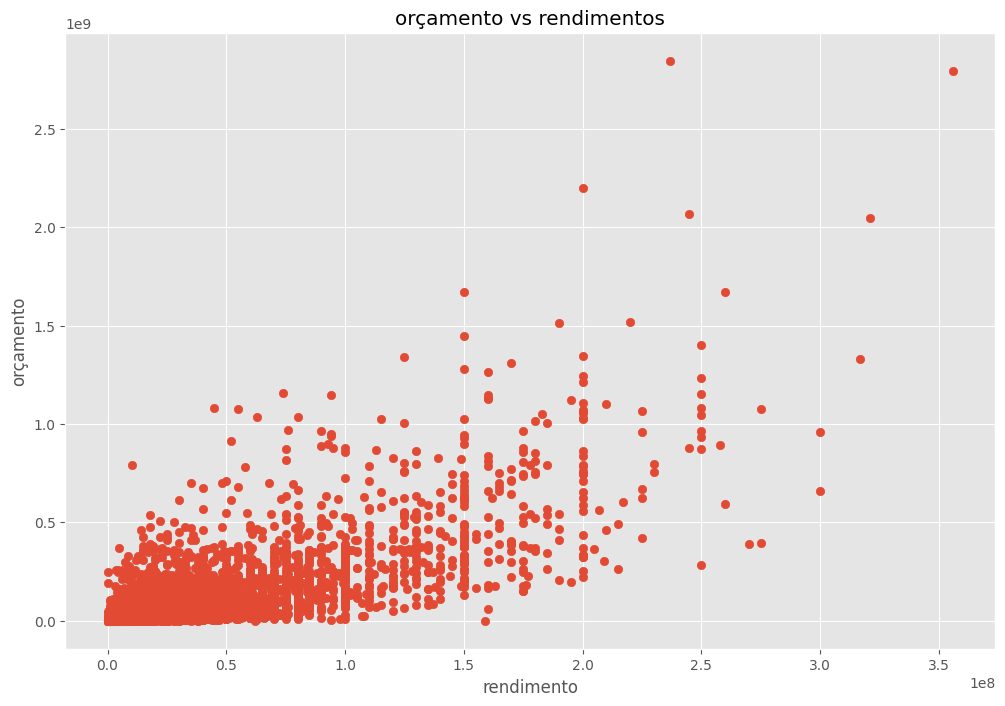

In [28]:
plt.scatter(x=df['budget'], y=df['gross'])

plt.title('orçamento vs rendimentos')
plt.xlabel('rendimento')
plt.ylabel('orçamento')
plt.show

<Axes: xlabel='budget', ylabel='gross'>

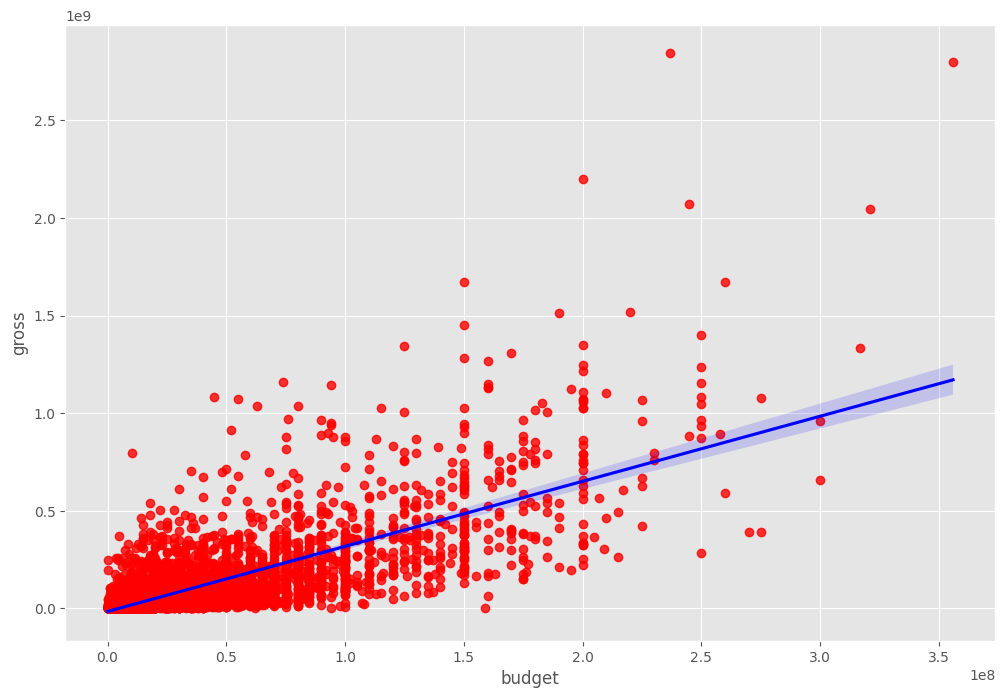

In [30]:
sns.regplot(x='budget', y='gross',data=df, scatter_kws={"color":"red"}, line_kws={'color':'blue'})

In [33]:
df1 = df.select_dtypes(include=['number'])
df1.corr(method='pearson')


,year,score,votes,budget,gross,runtime
year,1.000000,0.056386,0.206021,0.327722,0.274321,0.075077
score,0.056386,1.000000,0.474256,0.072001,0.222556,0.414068
votes,0.206021,0.474256,1.000000,0.439675,0.614751,0.352303
budget,0.327722,0.072001,0.439675,1.000000,0.740247,0.318695
gross,0.274321,0.222556,0.614751,0.740247,1.000000,0.275796
runtime,0.075077,0.414068,0.352303,0.318695,0.275796,1.000000


<function matplotlib.pyplot.show(close=None, block=None)>

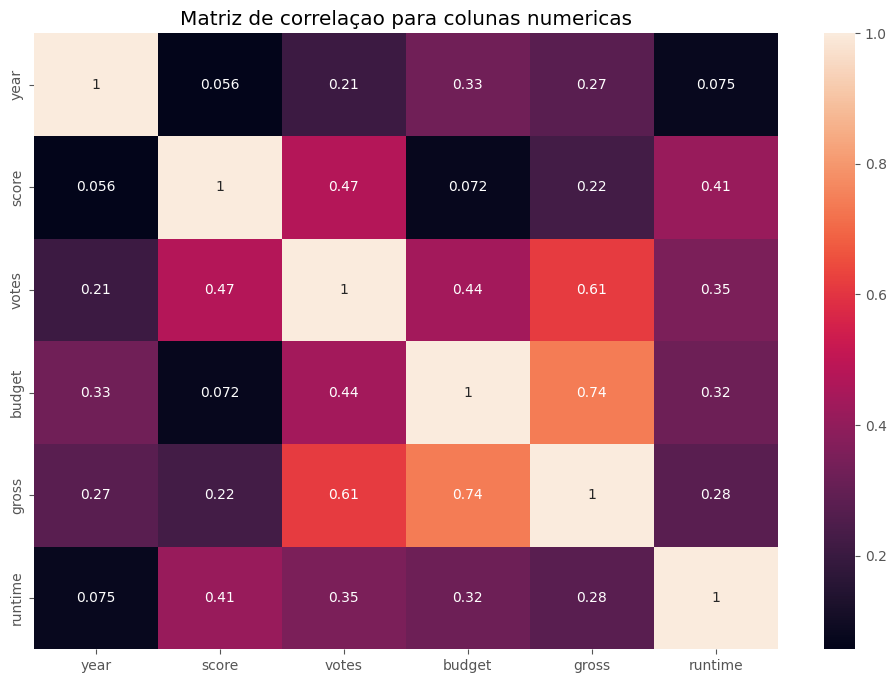

In [38]:
sns.heatmap(df1.corr(method='pearson'),annot=True)
plt.title('Matriz de correlaçao para colunas numericas')

plt.show

In [40]:
df_numerizado = df

for coluna in df_numerizado.columns:
    if df_numerizado[coluna].dtype == 'object':
        df_numerizado[coluna] = df_numerizado[coluna].astype('category')
        df_numerizado[coluna] = df_numerizado[coluna].cat.codes

df_numerizado


,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,ano,released1
0,4692,6,6,1980,1304,8.4,927000.0,1795,2832,699,46,19000000,46998772,1426,146.0,0,NaT
1,3929,6,1,1980,1127,5.8,65000.0,1578,1158,214,47,4500000,58853106,452,104.0,0,NaT
2,3641,4,0,1980,1359,8.7,1200000.0,757,1818,1157,47,18000000,538375067,945,124.0,0,NaT
3,204,4,4,1980,1127,7.7,221000.0,889,1413,1474,47,3500000,83453539,1108,88.0,0,NaT
4,732,6,4,1980,1170,7.3,108000.0,719,351,271,47,6000000,39846344,1083,98.0,0,NaT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7648,415,6,0,2020,904,6.6,140000.0,16,2390,1812,47,90000000,426505244,452,124.0,40,NaT
7649,3556,4,0,2020,713,6.5,102000.0,852,2309,147,47,85000000,319715683,1108,99.0,40,NaT
7650,1153,4,1,2020,904,5.6,53000.0,1809,2827,1470,47,175000000,245487753,1397,101.0,40,NaT
7651,3978,4,1,2020,758,6.8,42000.0,294,2091,640,6,135000000,111105497,12,100.0,40,NaT


In [ ]:
sns.heatmap(df_numerizado.corr(method='pearson'),annot=True)

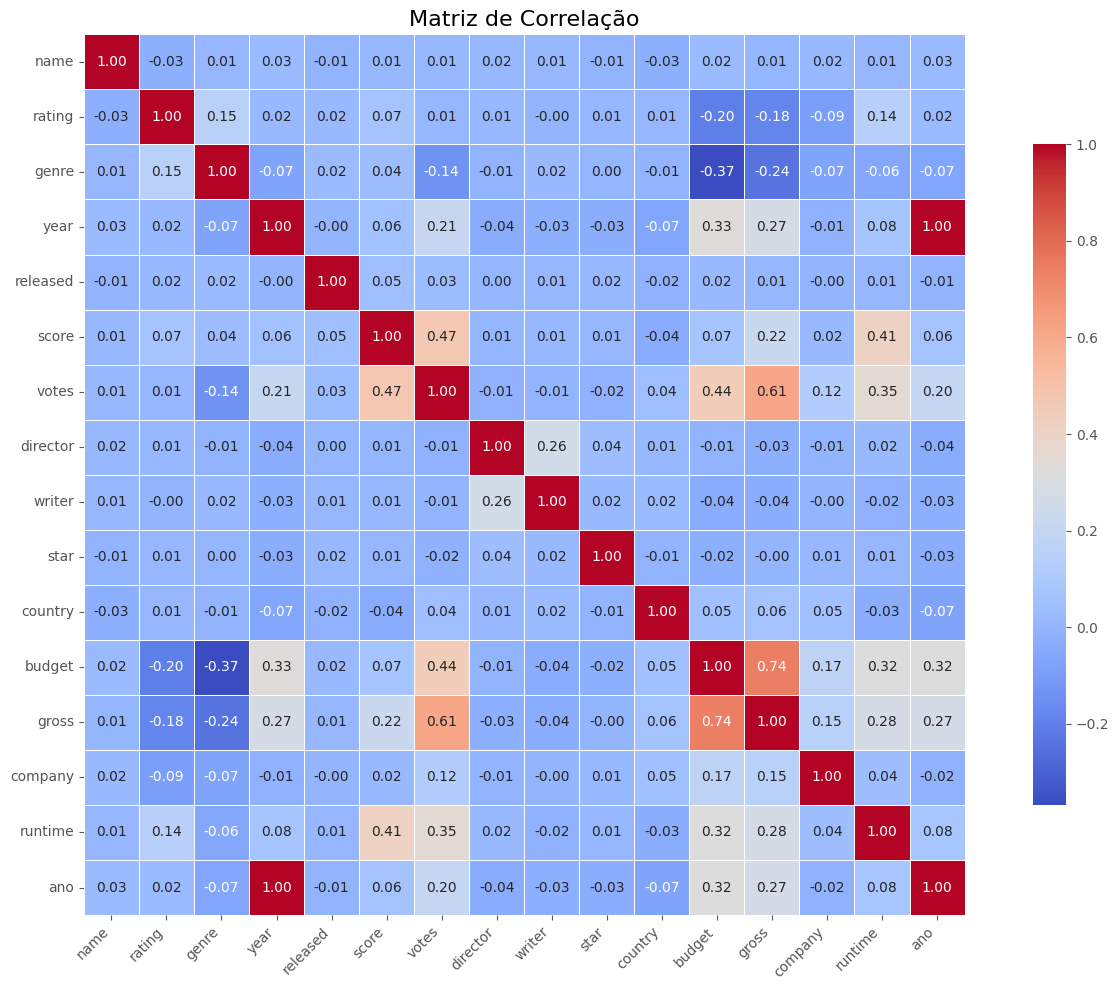

In [41]:
df_numerico = df.select_dtypes(include=['number'])


matriz_corr = df_numerico.corr(method='pearson')  


plt.figure(figsize=(14, 10))  
sns.heatmap(matriz_corr, 
            annot=True,         
            fmt=".2f",          
            cmap='coolwarm',    
            square=True,        
            linewidths=0.5,     
            cbar_kws={"shrink": 0.75})  

plt.title('Matriz de Correlação', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [44]:
matriz_correlacao = df_numerizado.corr()

pares_correlacao = matriz_correlacao.unstack()

pares_correlacao= pares_correlacao.sort_values()

altaCorr = pares_correlacao[(pares_correlacao)>0.5]

altaCorr

gross     votes       0.614751
votes     gross       0.614751
gross     budget      0.740247
budget    gross       0.740247
year      ano         0.998726
ano       year        0.998726
director  director    1.000000
votes     votes       1.000000
released  released    1.000000
score     score       1.000000
rating    rating      1.000000
name      name        1.000000
genre     genre       1.000000
year      year        1.000000
budget    budget      1.000000
country   country     1.000000
writer    writer      1.000000
star      star        1.000000
company   company     1.000000
gross     gross       1.000000
runtime   runtime     1.000000
ano       ano         1.000000
dtype: float64

Orçamento e Rendimento -- 0.74

Votos e Rendimento -- 0.61

Empresas e diretores nao inflienciam tanto